In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("dirty_iris.csv")
df

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,6.4,3.2,4.5,1.5,versicolor
1,6.3,3.3,6.0,2.5,virginica
2,6.2,NaN,5.4,2.3,virginica
3,5.0,3.4,1.6,0.4,setosa
4,5.7,2.6,3.5,1.0,versicolor
...,...,...,...,...,...
145,6.7,3.1,5.6,2.4,virginica
146,5.6,3.0,4.5,1.5,versicolor
147,5.2,3.5,1.5,0.2,setosa
148,6.4,3.1,NaN,1.8,virginica


In [6]:
df.isna().sum()

Sepal.Length    10
Sepal.Width     17
Petal.Length    19
Petal.Width     12
Species          0
dtype: int64

In [8]:
data = df.dropna(thresh = 5)
data

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,6.4,3.2,4.5,1.5,versicolor
1,6.3,3.3,6.0,2.5,virginica
3,5.0,3.4,1.6,0.4,setosa
4,5.7,2.6,3.5,1.0,versicolor
7,5.9,3.0,5.1,1.8,virginica
...,...,...,...,...,...
143,6.3,2.9,5.6,1.8,virginica
144,5.7,2.5,5.0,2.0,virginica
145,6.7,3.1,5.6,2.4,virginica
146,5.6,3.0,4.5,1.5,versicolor


In [9]:
og_len = len(df)
complete = len(data)
per = (complete/og_len)*100
print("The number that are complete", complete, "and percentage of observations" , per)

The number that are complete 96 and percentage of observations 64.0


In [10]:
df.nunique()

Sepal.Length    36
Sepal.Width     24
Petal.Length    45
Petal.Width     23
Species          3
dtype: int64

In [11]:
df['Sepal.Length'].unique()

array([ 6.4,  6.3,  6.2,  5. ,  5.7,  5.3,  5.9,  5.8,  4.8,  6. ,  6.8,
        nan,  5.5,  4.7,  5.6,  4.9,  5.4,  6.7,  4.6, 73. ,  6.5,  4.4,
        6.6,  0. ,  7.7,  7. ,  5.2,  5.1,  7.4,  4.3,  7.2,  6.1,  6.9,
        7.6,  7.9,  4.5, 49. ])

In [12]:
special_values = ["#", "?", np.inf]
data.replace(special_values, np.nan, inplace=True)

C:\Users\CSLab\AppData\Local\Temp\ipykernel_14132\3526107937.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.replace(special_values, np.nan, inplace=True)


In [13]:
data.isna().sum()

Sepal.Length    0
Sepal.Width     0
Petal.Length    0
Petal.Width     1
Species         0
dtype: int64

In [14]:
data.dropna()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,6.4,3.2,4.5,1.5,versicolor
1,6.3,3.3,6.0,2.5,virginica
3,5.0,3.4,1.6,0.4,setosa
4,5.7,2.6,3.5,1.0,versicolor
7,5.9,3.0,5.1,1.8,virginica
...,...,...,...,...,...
143,6.3,2.9,5.6,1.8,virginica
144,5.7,2.5,5.0,2.0,virginica
145,6.7,3.1,5.6,2.4,virginica
146,5.6,3.0,4.5,1.5,versicolor


In [15]:
rule1 = data["Species"].apply(lambda x: True if x in ("setosa", "versicolor", "virginica") else False)
rule2= data.apply(lambda x: True if x["Sepal.Length"]>=0 and x["Sepal.Width"]>=0 and x["Petal.Length"]>=0 and x["Petal.Width"]>=0 else False,axis=1)
rule3 = data.apply(lambda x: True if x["Petal.Length"] >= (2 * x["Petal.Width"]) else False, axis = 1)
rule4 = data["Sepal.Length"].apply(lambda x: True if x <= 30 else False)
rule5 = data.apply(lambda x: True if x["Sepal.Length"] >= x["Petal.Length"] else False, axis = 1)

In [16]:
Ruleset = pd.DataFrame({"Rule1" : rule1, "Rule2" : rule2, "Rule3" : rule3, "Rule4" : rule4, "Rule5" : rule5})
Ruleset

,Rule1,Rule2,Rule3,Rule4,Rule5
0,True,True,True,True,True
1,True,True,True,True,True
3,True,True,True,True,True
4,True,True,True,True,True
7,True,True,True,True,True
...,...,...,...,...,...
143,True,True,True,True,True
144,True,True,True,True,True
145,True,True,True,True,True
146,True,True,True,True,True


In [17]:
data2=Ruleset.apply(lambda x: len(x)-x.sum())
print("Violations->")
print(data2)

Violations->
Rule1    0
Rule2    2
Rule3    2
Rule4    1
Rule5    1
dtype: int64


Text(0.5, 1.0, 'RULES VS NO. OF VIOLATIONS')

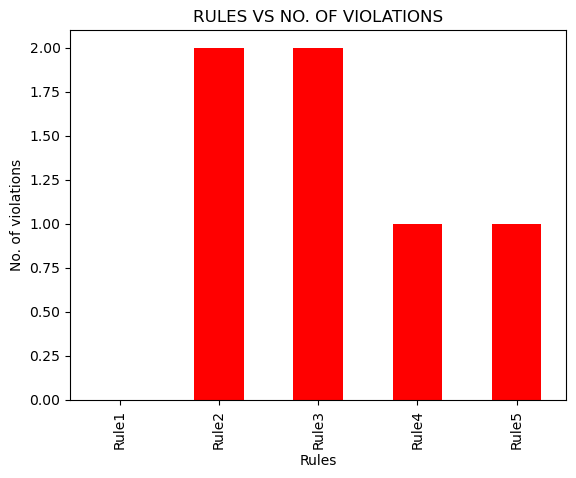

In [19]:
plt.figure()
data2.plot(kind="bar",color="r")
plt.xlabel("Rules")
plt.ylabel("No. of violations")
plt.title("RULES VS NO. OF VIOLATIONS")

In [20]:
data2.describe()

count    5.00000
mean     1.20000
std      0.83666
min      0.00000
25%      1.00000
50%      1.00000
75%      2.00000
max      2.00000
dtype: float64

C:\Users\CSLab\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sepal.Length'>

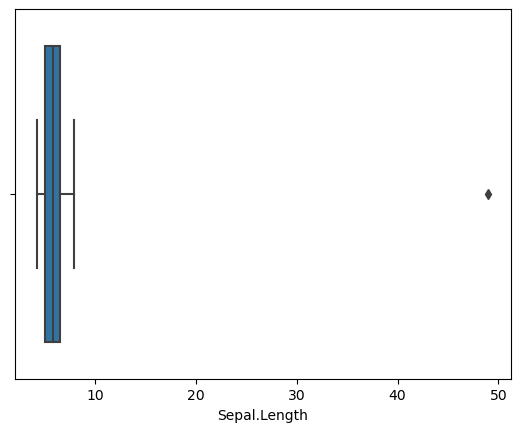

In [21]:
import seaborn as sns
x=data["Sepal.Length"]
sns.boxplot(x)

In [22]:
x.describe()

count    96.000000
mean      6.319792
std       4.482918
min       4.300000
25%       5.100000
50%       5.800000
75%       6.500000
max      49.000000
Name: Sepal.Length, dtype: float64

In [23]:
myfile=open("iris.txt")
data=myfile.read()

In [24]:
print(data)

Species should be one of the following values: setosa, versicolor or virginica.
All measured numerical properties of an iris should be positive.
The petal length of an iris is at least 2 times its petal width.
The sepal length of an iris cannot exceed 30 cm.
The sepals of an iris are longer than its petals.
